In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [3]:
urllib.request.urlretrieve(url,"heart.csv")

('heart.csv', <http.client.HTTPMessage at 0x7fe3a4f0bf40>)

In [4]:
column_names = ["age","sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [5]:
data = pd.read_csv("heart.csv", names = column_names)

In [6]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
columns_with_qm = data.columns[data.isin(["?"]).any()]

In [9]:
columns_with_qm

Index(['ca', 'thal'], dtype='object')

In [10]:
for col in columns_with_qm:
    mode = data[col].mode()[0]
    data.loc[data[col] == "?", col] = mode

In [11]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
data['ca'] = le.fit_transform(data['ca'])
data['thal'] = le.fit_transform(data['thal'])

In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,0.831683,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,4.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 33.3 KB


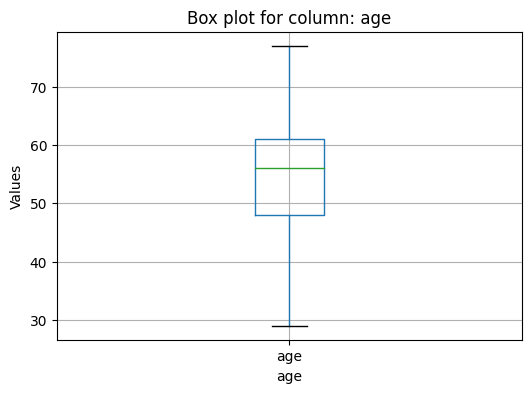

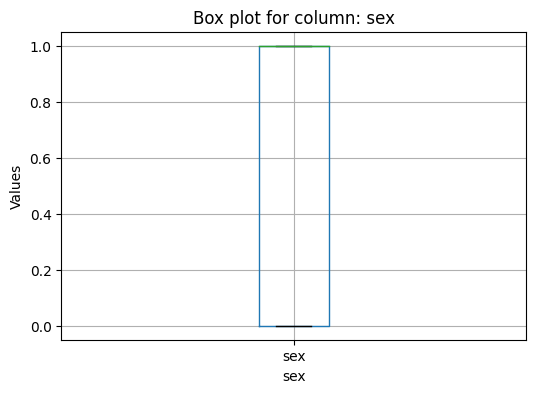

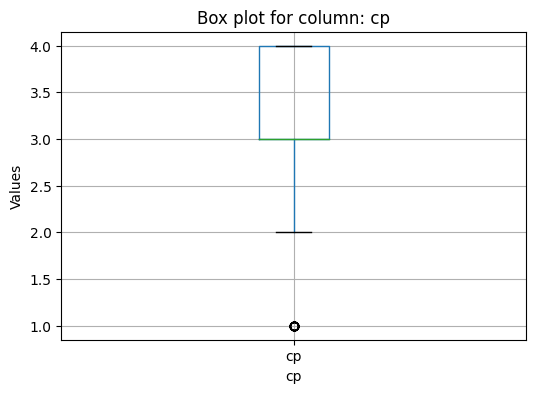

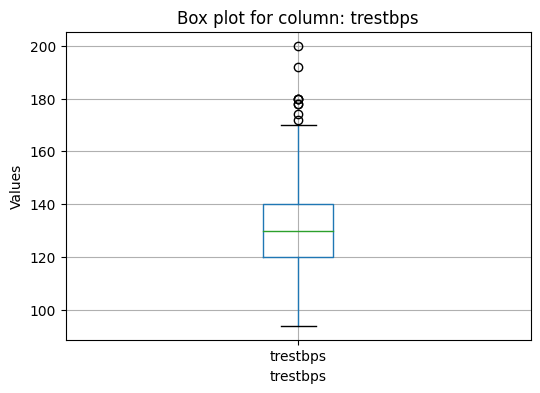

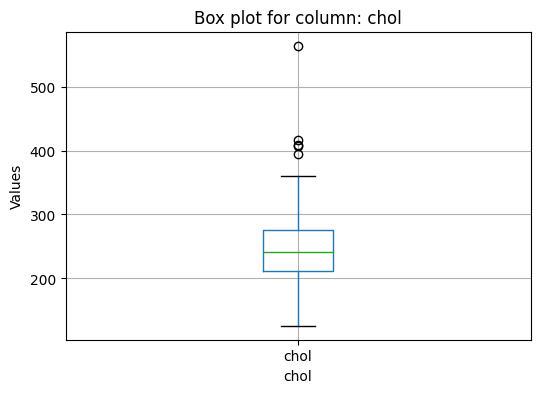

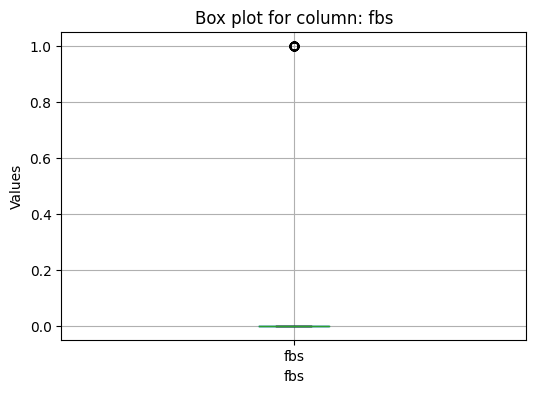

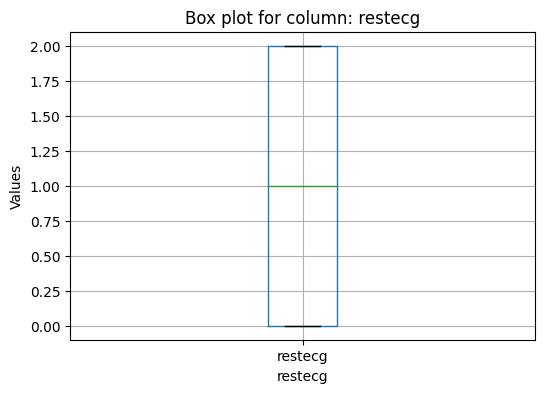

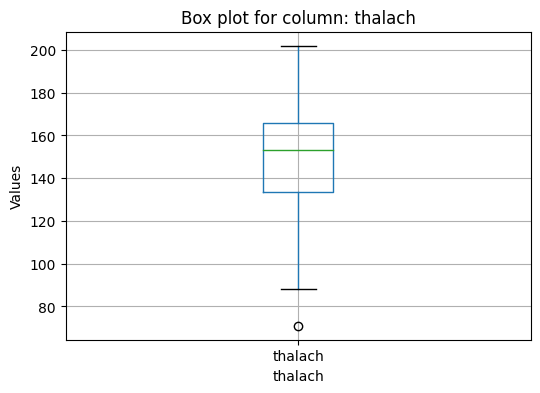

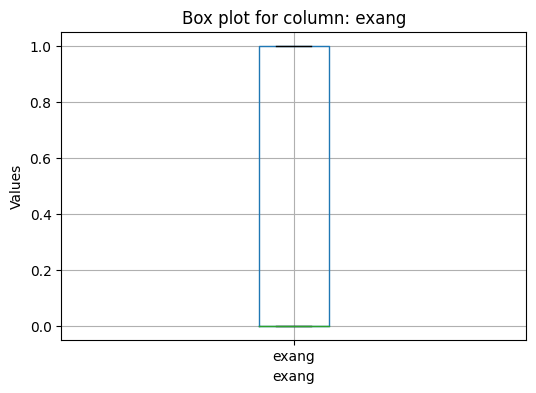

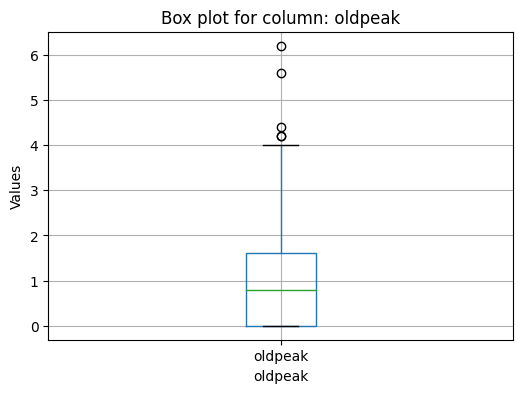

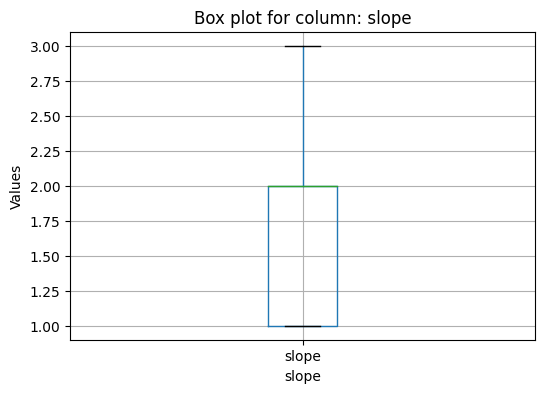

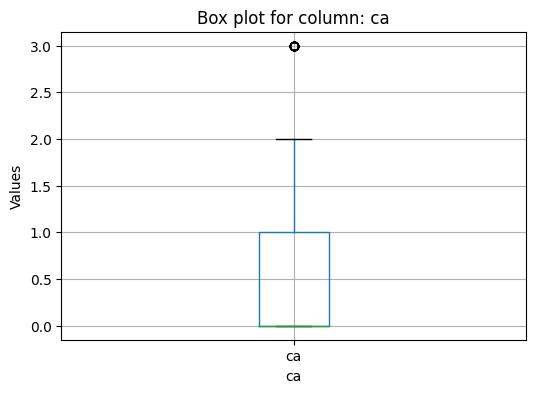

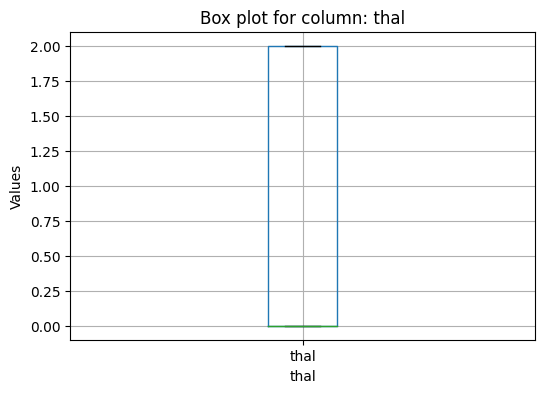

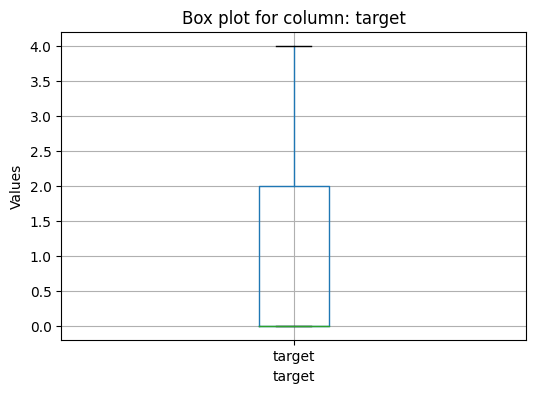

In [17]:
for col in data.columns:
  plt.figure(figsize=(6,4))
  data.boxplot(column=[col])
  plt.title(f"Box plot for column: {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Values")
  plt.show()

In [18]:
def remove_outlier(data):
    for col in data.columns:

        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)

        IQR = q3 - q1

        upperlimit = q3 + 1.5 * IQR
        lowerlimit = q1 - 1.5 * IQR

        print("Column:", col)
        print("Upper Limit:", upperlimit)
        print("Lower Limit:", lowerlimit)

        # Filter the data for the current column
        data = data[(data[col] >= lowerlimit) & (data[col] <= upperlimit)]

    return data

In [19]:
data = remove_outlier(data)
data.info()

Column: age
Upper Limit: 80.5
Lower Limit: 28.5
Column: sex
Upper Limit: 2.5
Lower Limit: -1.5
Column: cp
Upper Limit: 5.5
Lower Limit: 1.5
Column: trestbps
Upper Limit: 170.0
Lower Limit: 90.0
Column: chol
Upper Limit: 371.0
Lower Limit: 115.0
Column: fbs
Upper Limit: 0.0
Lower Limit: 0.0
Column: restecg
Upper Limit: 5.0
Lower Limit: -3.0
Column: thalach
Upper Limit: 220.125
Lower Limit: 79.125
Column: exang
Upper Limit: 2.5
Lower Limit: -1.5
Column: oldpeak
Upper Limit: 4.0
Lower Limit: -2.4000000000000004
Column: slope
Upper Limit: 3.5
Lower Limit: -0.5
Column: ca
Upper Limit: 2.5
Lower Limit: -1.5
Column: thal
Upper Limit: 5.0
Lower Limit: -3.0
Column: target
Upper Limit: 2.5
Lower Limit: -1.5
<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 2 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       187 non-null    float64
 1   sex       187 non-null    float64
 2   cp        187 non-null    float6

In [20]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0,0,0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0,0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0,0,0
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0,2,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1,0,1


In [21]:
X = data.drop('target', axis = 1)

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0,0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0,0
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0,0
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0,2
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1,0


In [23]:
y = data.target
y

2      1
3      0
4      0
5      0
7      0
      ..
294    1
295    0
297    1
301    1
302    0
Name: target, Length: 187, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)

In [29]:
X_train.std()

0.9607689228305227

In [30]:
X_test = sc.fit_transform(X_test)

In [31]:
X_test.std()

0.9607689228305228

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lgr = LogisticRegression()

In [34]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred = lgr.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy = accuracy_score(y_test, y_pred)

In [38]:
accuracy

0.6578947368421053

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
rs = recall_score(y_test, y_pred, average="weighted")
rs

0.6578947368421053

In [41]:
ps = precision_score(y_test, y_pred, average="weighted")
ps

0.6035087719298246

In [42]:
f1 = f1_score(y_test, y_pred, average="weighted")
f1

0.628413138108429

In [43]:
from sklearn.metrics import classification_report

In [44]:
classificationReport = classification_report(y_test, y_pred)
classificationReport

'              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84        27\n           1       0.17      0.12      0.14         8\n           2       0.00      0.00      0.00         3\n\n    accuracy                           0.66        38\n   macro avg       0.32      0.34      0.33        38\nweighted avg       0.60      0.66      0.63        38\n'

In [45]:
from pprint import pprint

In [46]:
pprint(classificationReport)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.80      0.89      0.84        27\n'
 '           1       0.17      0.12      0.14         8\n'
 '           2       0.00      0.00      0.00         3\n'
 '\n'
 '    accuracy                           0.66        38\n'
 '   macro avg       0.32      0.34      0.33        38\n'
 'weighted avg       0.60      0.66      0.63        38\n')
